In [81]:
import pandas as pd
import numpy as np

In [ ]:
# Neste projeto, utilizei dados de camera-trap de meu doutorado em biologia, para tentar predizer se um mamifero silvestre, o veado-catingueiro
# poderia ou não ser fotogrado pelo equipamento, a partir de um algoritmo onde utilizei procedimentos de machine learning

In [69]:
sp = pd.read_csv("sp.csv")

In [ ]:
# Abaixo esta descrita a base de dados
#Pontos : ao todo foram instaladas 380 armadilhas camera trap em areas de Cerrado, temos aqui uma variavel booleana que indica a presençao ou ausencia de registro do mamifero no equipamento
#UC: variavel booleana, indica se a camera-trap foi instalada ou não instalada dentro de parque florestal
#psipuma: variavel float que indica a probabilidade da presença de um predador onde a camera-trap foi instalada
#Dist.agua: variavel float (padronizada) que indica a distancia da camera-trap para algum curso de agua natural
#Dist.comunidade:  variavel float  (padronizada) que indica a distancia da camera-trap para alguma comunidade humana
#CD: variavel booleana que indica se a camera-trap foi instalada em área de cerrado denso
#CR: variavel booleana que indica se a camera-trap foi instalada em área de cerrado ralo
#CT: variavel booleana que indica se a camera-trap foi instalada em área de cerrado tipico
#HU: variavel booleana que indica se a camera-trap foi instalada em área antropizada
#MS: variavel booleana que indica se a camera-trap foi instalada em área de mata seca
#VR: variavel booleana que indica se a camera-trap foi instalada em área de vegetação ripária
#trilha p1: variavel float (padronizada) que indica a largura da trilha onde a camera trap foi instalada
#gado p1: variavel booleana (padronizada) que indica a presença ou ausencia de gado onde a camera-trap foi instalada
#pppuma: variavel float que indica a probabilidade de detecção do predador (onça parda) na camera trap instalada

In [70]:
sp.head ()

,Pontos,UC,psipuma,Dist.agua,Dist.comunidade,CD,CR,CT,HU,MS,VR,trilha p1,gado p1,ppuma
0,1,1,0.0853,0.318,1.028,0,0,1,0,0,0,-0.708,1.0,0.0853
1,1,1,0.1187,1.040,-0.116,0,0,1,0,0,0,-0.207,0.0,0.1187
2,0,1,1.0000,1.638,-0.681,0,0,1,0,0,0,-0.225,1.0,1.0000
3,1,1,0.1175,1.293,0.975,0,0,1,0,0,0,-0.070,0.0,0.1175
4,1,1,0.1145,1.214,0.644,0,0,1,0,0,0,1.181,0.0,0.1145


In [71]:
sp.describe()

,Pontos,UC,psipuma,Dist.agua,Dist.comunidade,CD,CR,CT,HU,MS,VR,trilha p1,gado p1,ppuma
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.460526,0.505263,0.312781,-0.077205,0.015426,0.102632,0.213158,0.431579,0.094737,0.081579,0.073684,-0.018882,0.525000,0.312781
std,0.499097,0.500631,0.297485,1.029624,1.032455,0.303877,0.410078,0.495949,0.293237,0.274083,0.261601,0.981198,0.499373,0.297485
min,0.000000,0.000000,0.036400,-1.875000,-2.811000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.738000,0.000000,0.036400
25%,0.000000,0.000000,0.067275,-0.910000,-0.777250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.286500,0.000000,0.067275
50%,0.000000,1.000000,0.274700,-0.196000,-0.072500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014000,1.000000,0.274700
75%,1.000000,1.000000,0.445300,0.801250,0.791750,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.050000,1.000000,0.445300
max,1.000000,1.000000,1.000000,2.321000,2.829000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.159000,1.000000,1.000000


In [91]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pontos           380 non-null    int64  
 1   UC               380 non-null    int64  
 2   psipuma          380 non-null    float64
 3   Dist.agua        380 non-null    float64
 4   Dist.comunidade  380 non-null    float64
 5   CD               380 non-null    int64  
 6   CR               380 non-null    int64  
 7   CT               380 non-null    int64  
 8   HU               380 non-null    int64  
 9   MS               380 non-null    int64  
 10  VR               380 non-null    int64  
 11  trilha p1        380 non-null    float64
 12  gado p1          380 non-null    float64
 13  ppuma            380 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 41.7 KB


In [95]:
sp.drop (columns = ['ppuma'])

,Pontos,UC,psipuma,Dist.agua,Dist.comunidade,CD,CR,CT,HU,MS,VR,trilha p1,gado p1
0,1,1,0.0853,0.318,1.028,0,0,1,0,0,0,-0.708,1.0
1,1,1,0.1187,1.040,-0.116,0,0,1,0,0,0,-0.207,0.0
2,0,1,1.0000,1.638,-0.681,0,0,1,0,0,0,-0.225,1.0
3,1,1,0.1175,1.293,0.975,0,0,1,0,0,0,-0.070,0.0
4,1,1,0.1145,1.214,0.644,0,0,1,0,0,0,1.181,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1,0,0.4187,0.240,0.580,0,0,1,0,0,0,0.014,0.0
376,1,0,0.3581,-0.456,-0.226,0,0,1,0,0,0,0.014,0.0
377,0,0,0.2963,-1.225,-1.085,0,0,1,0,0,0,0.014,0.0
378,1,0,0.3923,-0.063,-0.150,0,0,0,0,0,1,0.014,0.0


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# A seguir exploramos em graficos as variaveis quantitativas a serem utilizadas

Text(0.5, 0, 'Distancia de curso de agua')

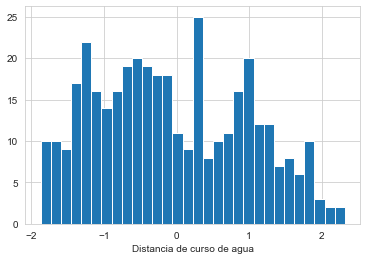

In [99]:
sns.set_style('whitegrid')
sp['Dist.agua'].hist(bins=30)
plt.xlabel('Distancia de curso de agua')

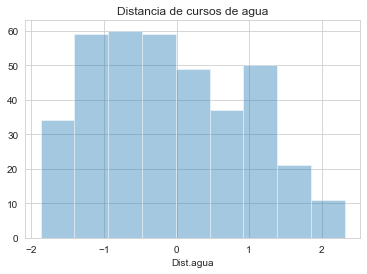

In [106]:
sns.distplot(sp["Dist.agua"], kde = False).set_title("Distancia de cursos de agua")
plt.show()

Text(0.5, 0, 'Distancia de comunidades humanas')

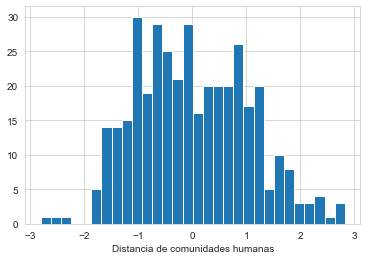

In [100]:
sns.set_style('whitegrid')
sp['Dist.comunidade'].hist(bins=30)
plt.xlabel('Distancia de comunidades humanas')

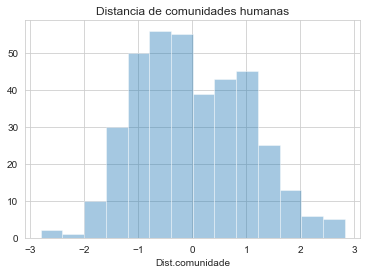

In [107]:
sns.distplot(sp["Dist.comunidade"], kde = False).set_title("Distancia de comunidades humanas")
plt.show()

Text(0.5, 0, 'Largura da trilha  onde foram instaladas as cameras traps')

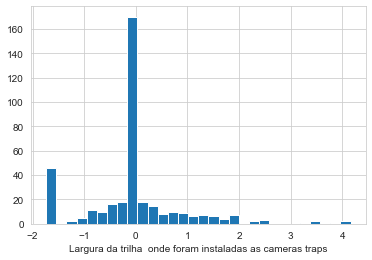

In [101]:
sns.set_style('whitegrid')
sp['trilha p1'].hist(bins=30)
plt.xlabel('Largura da trilha  onde foram instaladas as cameras traps')

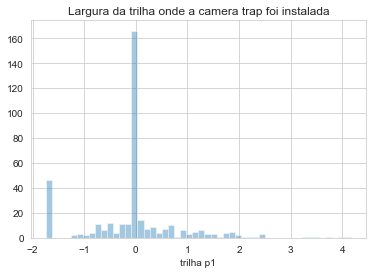

In [108]:
sns.distplot(sp["trilha p1"], kde = False).set_title("Largura da trilha onde a camera trap foi instalada")
plt.show()

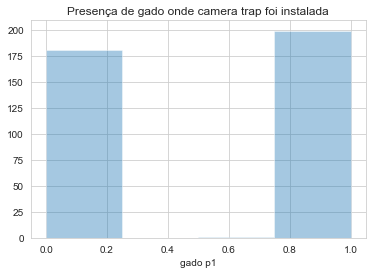

In [109]:
sns.distplot(sp["gado p1"], kde = False).set_title("Presença de gado onde camera trap foi instalada")
plt.show()

Text(0.5, 0, 'Presença de gado')

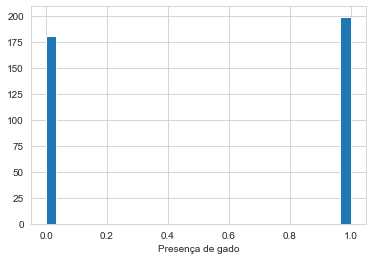

In [110]:
sns.set_style('whitegrid')
sp['gado p1'].hist(bins=30)
plt.xlabel('Presença de gado')

Text(0.5, 0, 'Presença do predador onça parda')

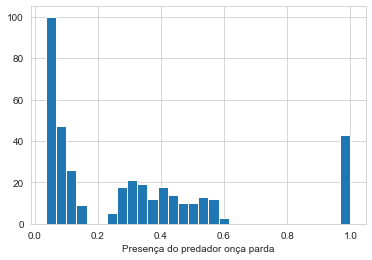

In [103]:
sns.set_style('whitegrid')
sp['psipuma'].hist(bins=30)
plt.xlabel('Presença do predador onça parda')

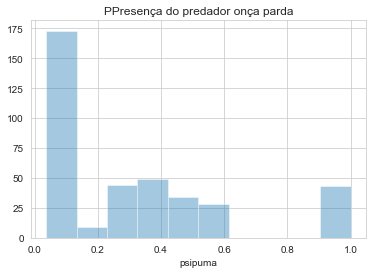

In [111]:
sns.distplot(sp["psipuma"], kde = False).set_title("Presença do predador onça parda")
plt.show()

In [ ]:
# Nestas analise exploratoria, observamos a regressão entre a variavei de interesse 'Pontos' (presença ou ausencia de veado nas cameras traps)
# com relação as variaveis que foram medidas

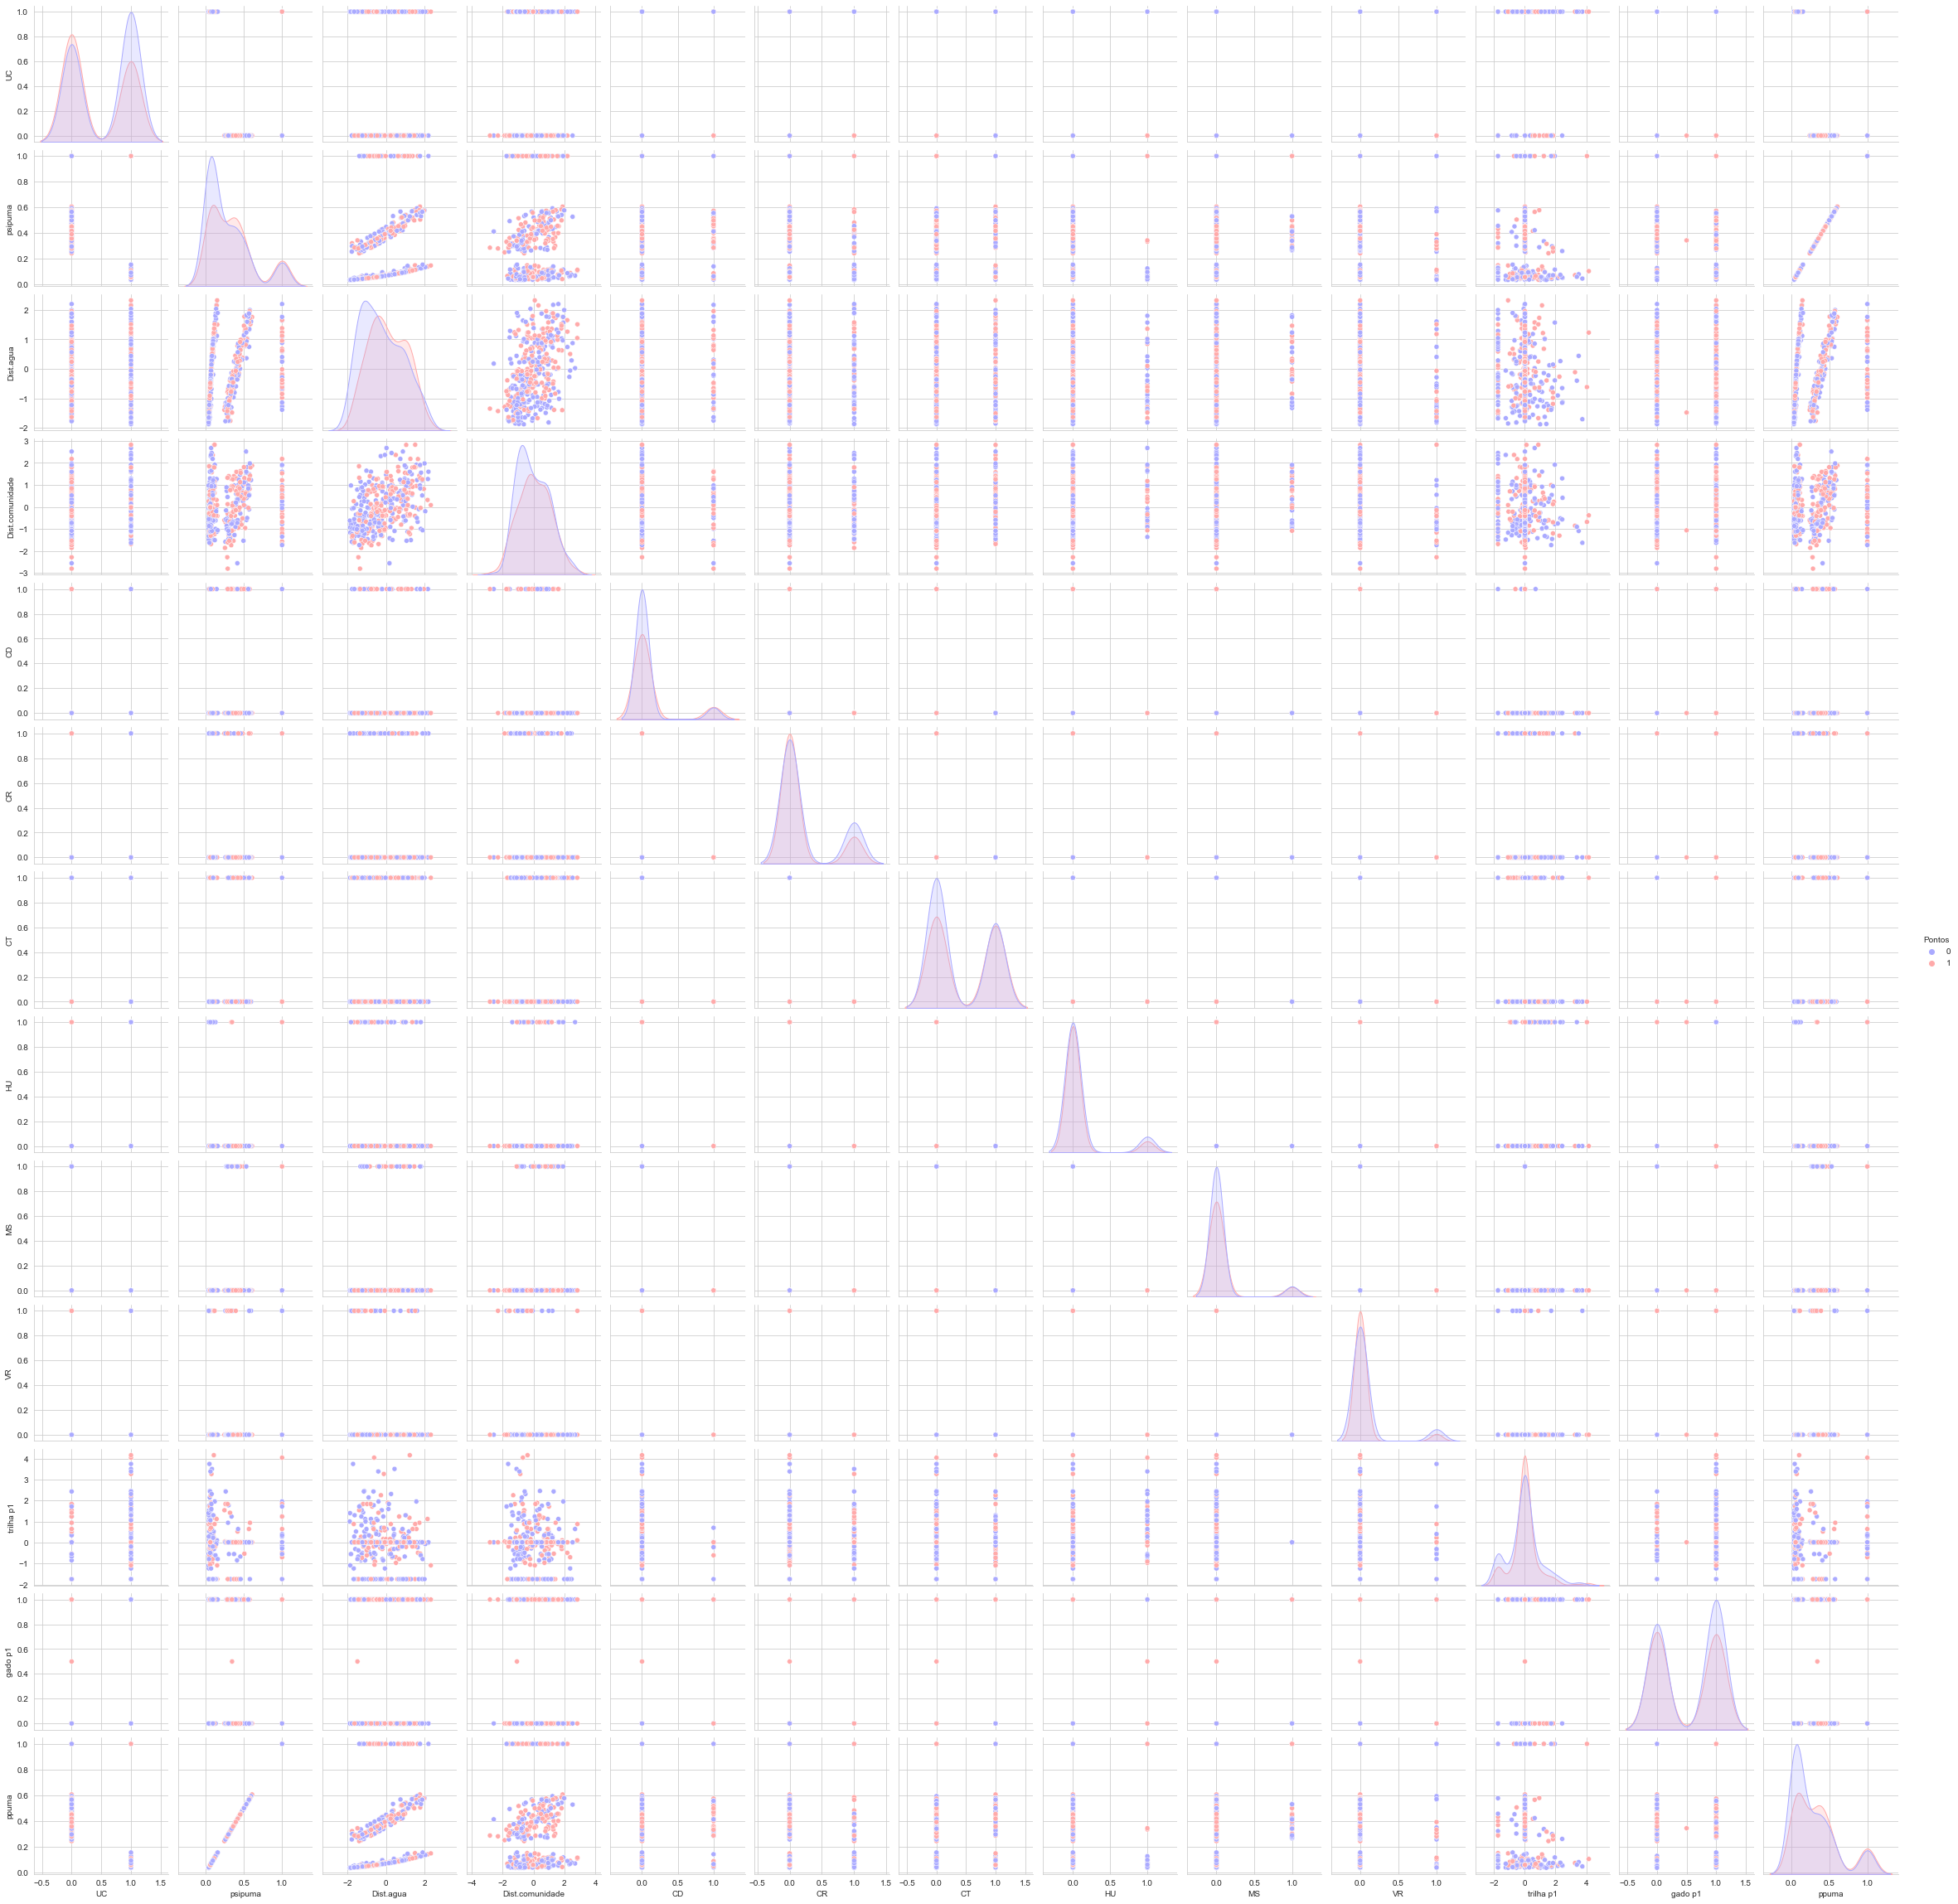

In [116]:
sns.pairplot(sp,hue='Pontos',palette='bwr')

In [ ]:
#abaixo vamos treinar um algoritmo de machine learning (regressão logistica), para tentar prever se o mamifero vai ser ou nao fotografado pela camera trap

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x = sp[['UC', 'psipuma', 'Dist.agua','Dist.comunidade', 'CD', 'CR', 'CT','HU','MS','VR','trilha p1', 'gado p1']]
y = sp['Pontos']

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [123]:
predictions = logmodel.predict(x_test)

In [124]:
from sklearn.metrics import classification_report

In [125]:
#Abaixo vemos a precisão e acuracia deste treinamento baseado em dados reais

In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63        65
           1       0.56      0.33      0.41        61

    accuracy                           0.55       126
   macro avg       0.55      0.54      0.52       126
weighted avg       0.55      0.55      0.53       126

